<a href="https://colab.research.google.com/github/jiayin2-1765399/jiayin2-1765399.github.io/blob/master/CFRM420_HW5%5Bjiayin2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 5


__Problem 1__ (50 pts) Consider HW4-Problem 2.  

__Part 1__ (25 pts) This part is a continuation of HW4-Problem2-Part1.  Check the fitted model from HW4-Problem2-Part1 for the following anomalies: 

* high-leverage points
* residual outliers
* high-influence points
* non-normality 

Explain your answers and provide necessary plots to justify them.

__Part 2__ (25 pts) This part is a continuation of HW4-Problem2-Part4.  Check the fitted cubic polynomial model from HW4-Problem2-Part4 for the following anomalies:

* high-leverage points
* residual outliers
* high-influence points
* non-normality 

Explain your answers and provide necessary plots to justify them.

______

**Part 1:** Part 1 in Problem 2 use the following model 
$$
\text{EMP}_{i}=\beta_0+\beta_1 \text{MAT}_{i}  + \varepsilon_{i}
$$ 
**High-leverage point**: From the graph on the left, we can see that the red linear line does not fit the data set under this regression model. We can calculate the hat matrix H for this model using hatvalue(), then plot the leverage for each observation on the right-side graph. By the theory of leverage point, an observation whose leverage value is twice the average is considered a high-leverage point, if $H_{nn} > 2 \frac{P+1}{N}$ with P = 2 since we have two coefficients intercept and MAT, and N = 116 as the total number of observations. Then we draw the red line indicates the bar, however, all the point is below the red line, thus the high leverage point is hard to detect.


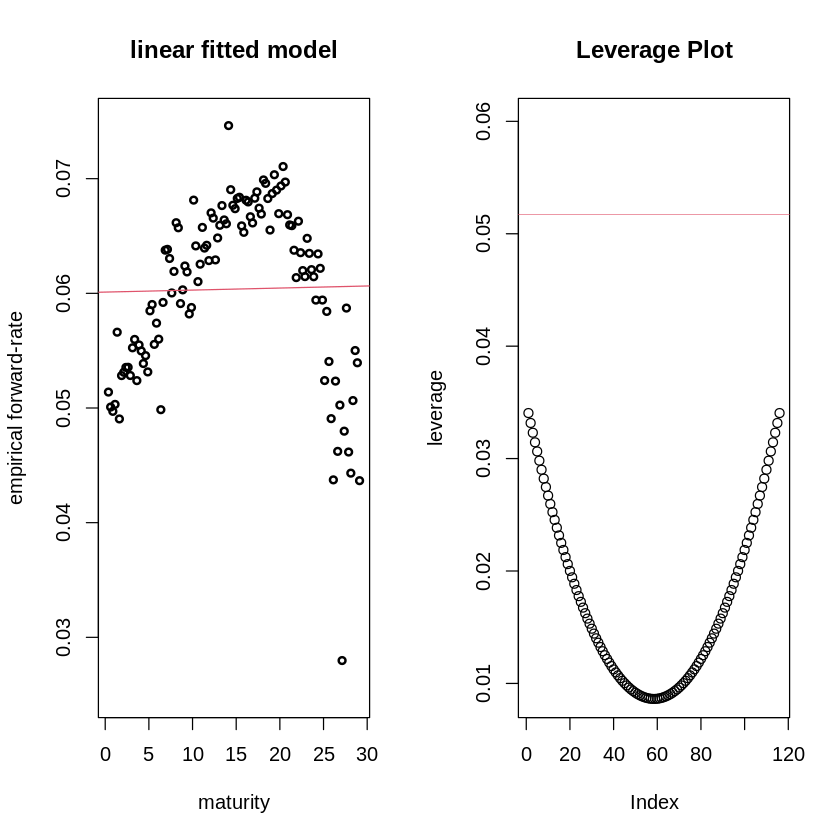

In [2]:
require(dplyr)
require(magrittr)

dat = read.table("2020-HW4-data.txt",header=TRUE) 
colnames(dat) = c("MAT","Price")
data = dat %>% arrange(MAT)
 
EMP = -diff(log(data$Price))/diff(data$MAT) 
MAT = data$MAT[-1]
df_targetdata = data.frame(EMP=EMP, MAT=MAT)

par(mfrow = c(1,2))
fit0 = lm(EMP ~ MAT, data = df_targetdata)
plot(MAT,EMP,ylim=c(0.025,.075),lwd=2,xlab="maturity",
     ylab="empirical forward-rate", main = "linear fitted model",cex=.75)
abline(fit0, col=2)

plot(hatvalues(fit0), ylab = "leverage", main = "Leverage Plot", ylim = c(0.009, 0.06))
p=2
n=length(MAT)
abline(h = 2*(p+1)/n, lwd = 0.5, col = 2)

**Residual outliers:** The following two graphs use the externally studentized residuals.

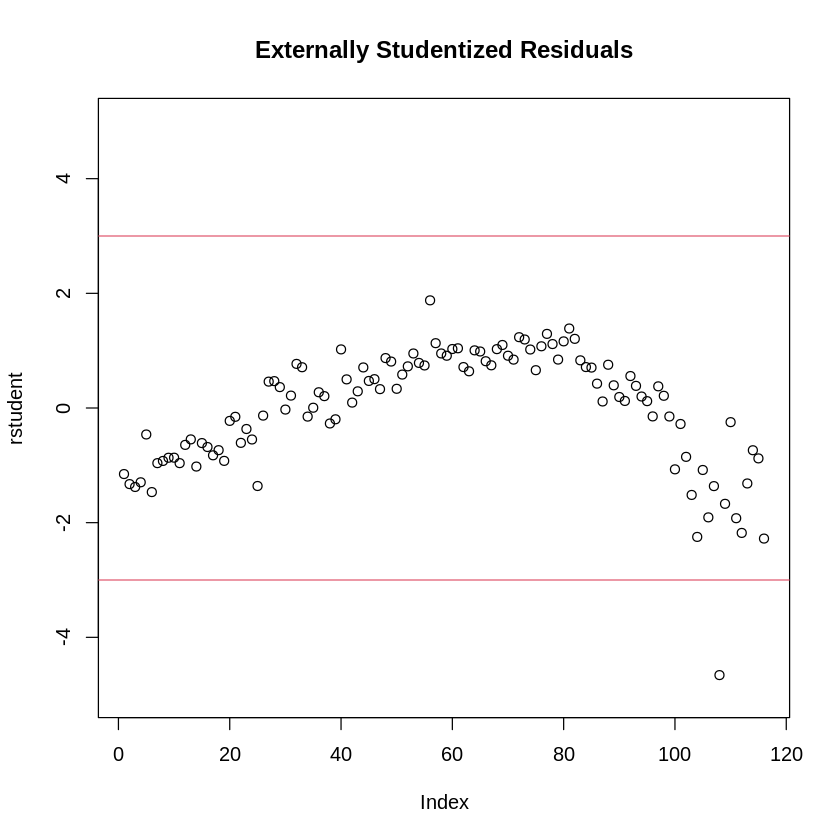

In [3]:
sigma = summary(fit0)$sigma
min_rstudent = min(rstudent(fit0))
max_rstudent = max(rstudent(fit0))
plot(rstudent(fit0), ylim = c(min(-5, min_rstudent),max(5, max_rstudent)),
     ylab = "rstudent", main = "Externally Studentized Residuals")
abline(h = c(-3,3), lwd = 1, col = 2)

**High-influence points:** The following two graphs plot the Cook's D distance and half-normal plot for each observations. Cook's D measures the influence of an obervation, and the observations with high Cook's D are called "high-influence" points.

In [4]:
install.packages("faraway")
require(faraway)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’


Loading required package: faraway



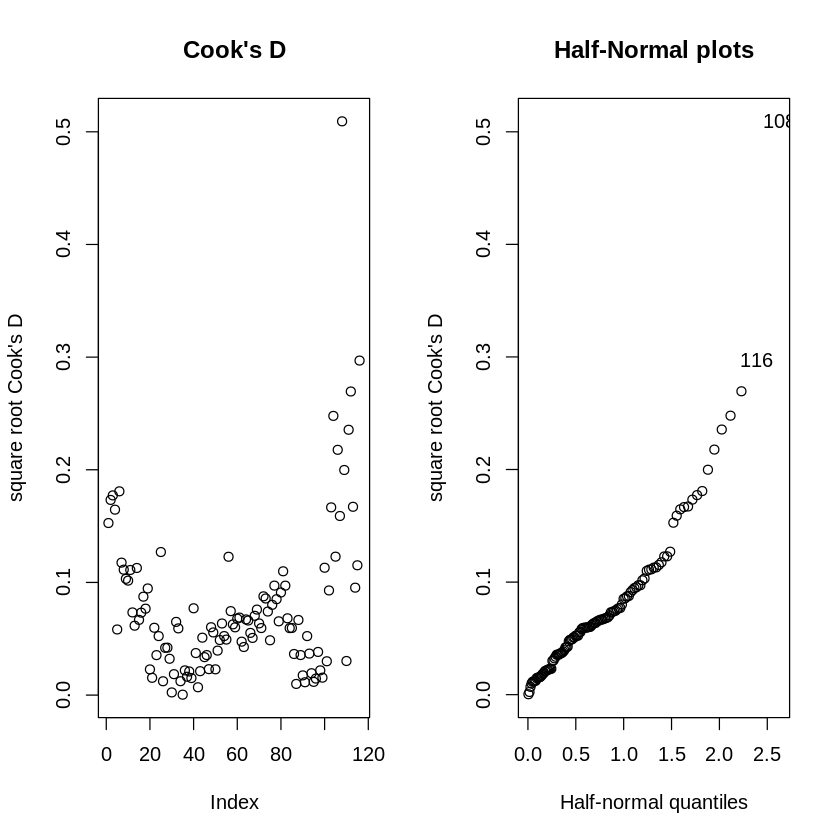

In [5]:
par(mfrow = c(1,2))
plot(sqrt(cooks.distance(fit0)), ylab = "square root Cook's D", main = "Cook's D")
halfnorm(sqrt(cooks.distance(fit0)), ylab = "square root Cook's D", main = "Half-Normal plots")

**Non-normality:** The following code graph the normal probability plot and KDE of rstudent residuals. The norm probability plot of rstudent indicates non-normality. The residuals seem to be left-skewed.

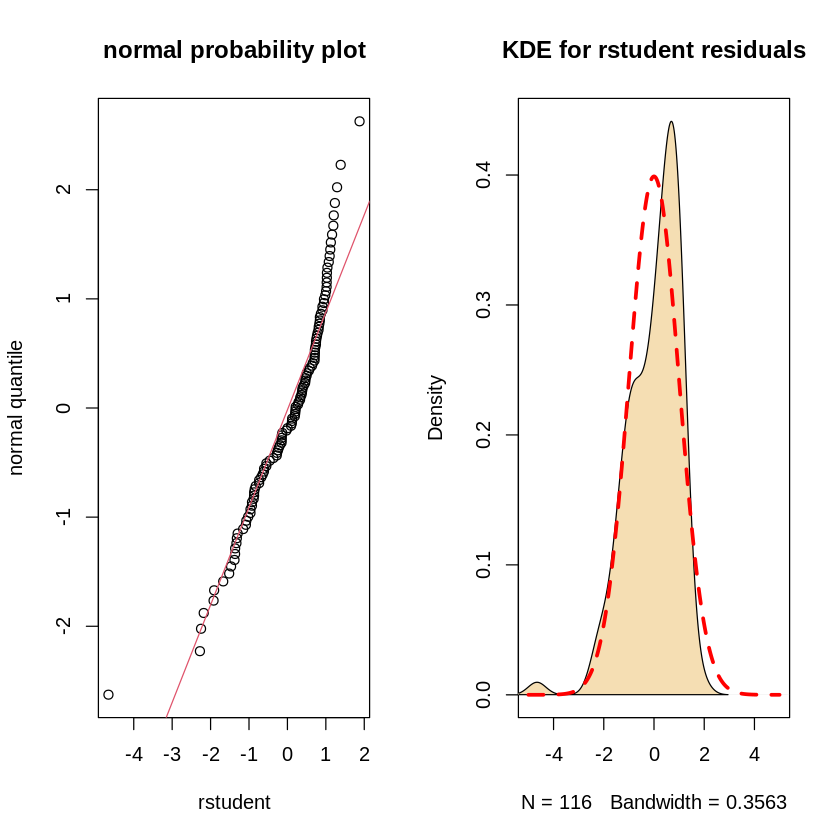

In [6]:
par(mfrow = c(1,2))

qqnorm(rstudent(fit0), datax = TRUE,
       xlab = "normal quantile", 
       ylab = "rstudent", 
       main = "normal probability plot")
qqline(rstudent(fit0), datax=TRUE, col = 2)
d <- density(rstudent(fit0), adjust = 1, na.rm = TRUE)
plot(d, type = "n", xlim=c(-5,5), main="KDE for rstudent residuals")
polygon(d, col = "wheat")
z = seq(from=-5,to=5,by=.01)
lines(z,dnorm(z), lty=2,lwd=3,col="red")

**Part 2:** The cubic polynomial model
$$
\text{EMP}_{i}=\beta_0+\beta_1 \text{MAT}_{i} + \beta_2 \text{MAT}_{i}^2 + \beta_3 \text{MAT}_{i}^3 + \varepsilon_{i}
$$ 
**High-leverage point**: From the graph on the left, we can see that the red linear line fit better the data set under cubic model than linear model. We can calculate the hat matrix H for this model using hatvalue(), then plot the leverage for each observation on the right-side graph. By the theory of leverage point, an observation whose leverage value is twice the average is considered a high-leverage point, if $H_{nn} > 2 \frac{P+1}{N}$ with P = 2 since we have two coefficients intercept and MAT, and N = 116 as the total number of observations. Then we draw the red line indicates the bar on the left-side plot. We can see that only 16 points is above the red line which indicates the high leverage point.

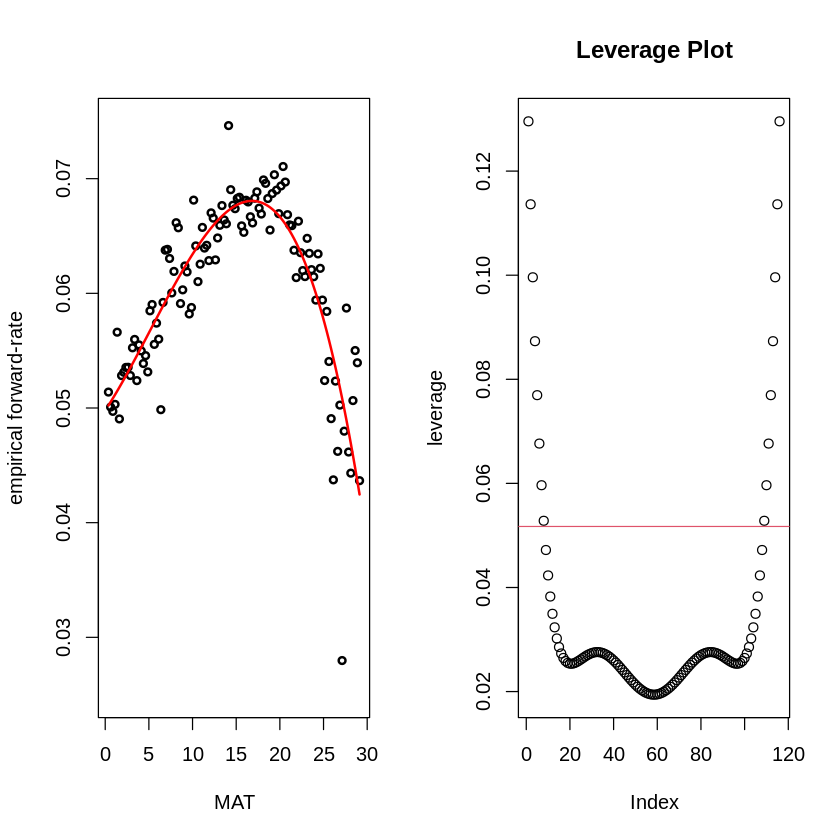

In [7]:
par(mfrow = c(1,2))
MAT2 = MAT**2
MAT3 = MAT**3
fit1 = lm(EMP ~ MAT + MAT2 + MAT3)
plot(MAT,EMP,ylim=c(0.025,.075),lwd=2,xlab="MAT",
     ylab="empirical forward-rate",cex=.75)
ord = order(MAT)
lines(MAT[ord], fitted(fit1)[ord], col="red", lwd=2)

H1 = hatvalues(fit1)
plot(H1, ylab = "leverage", main = "Leverage Plot")
abline(h = 2*(p+1)/n, lwd = 1, col = 2)

**Residual outliers:** The following two graphs use the externally studentized residuals.

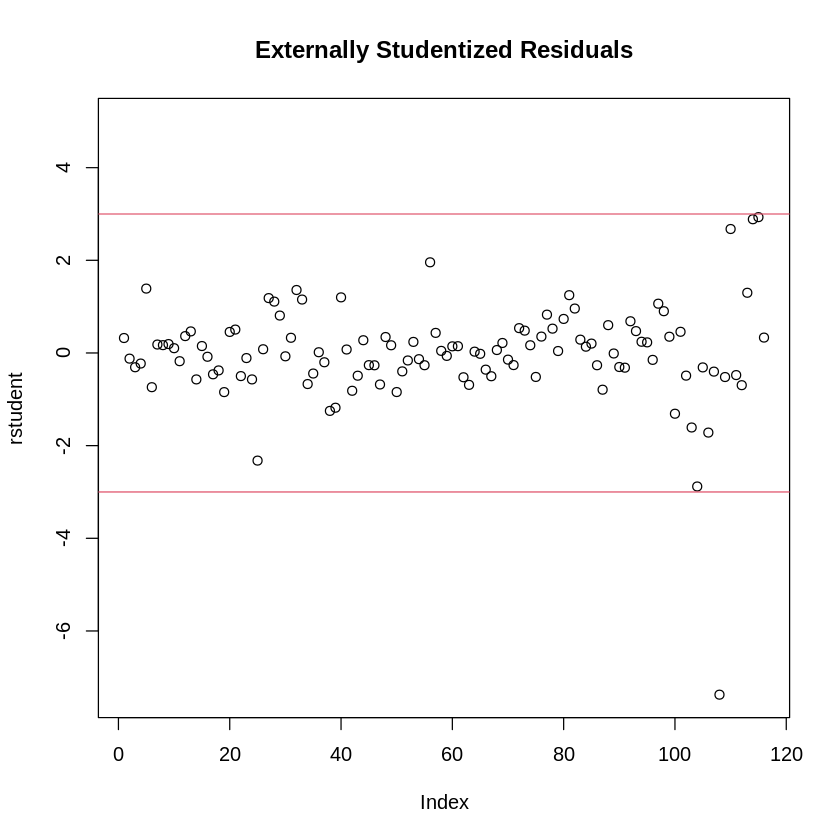

In [8]:
sigma = summary(fit1)$sigma
min_rstudent = min(rstudent(fit1))
max_rstudent = max(rstudent(fit1))
plot(rstudent(fit1), ylim = c(min(-5, min_rstudent),max(5, max_rstudent)),
     ylab = "rstudent", main = "Externally Studentized Residuals")
abline(h = c(-3,3), lwd = 1, col = 2)

**High-influence points:** The following two graphs plot the Cook's D distance and half-normal plot for each observations. Cook's D measures the influence of an obervation, and the observations with high Cook's D are called "high-influence" points.

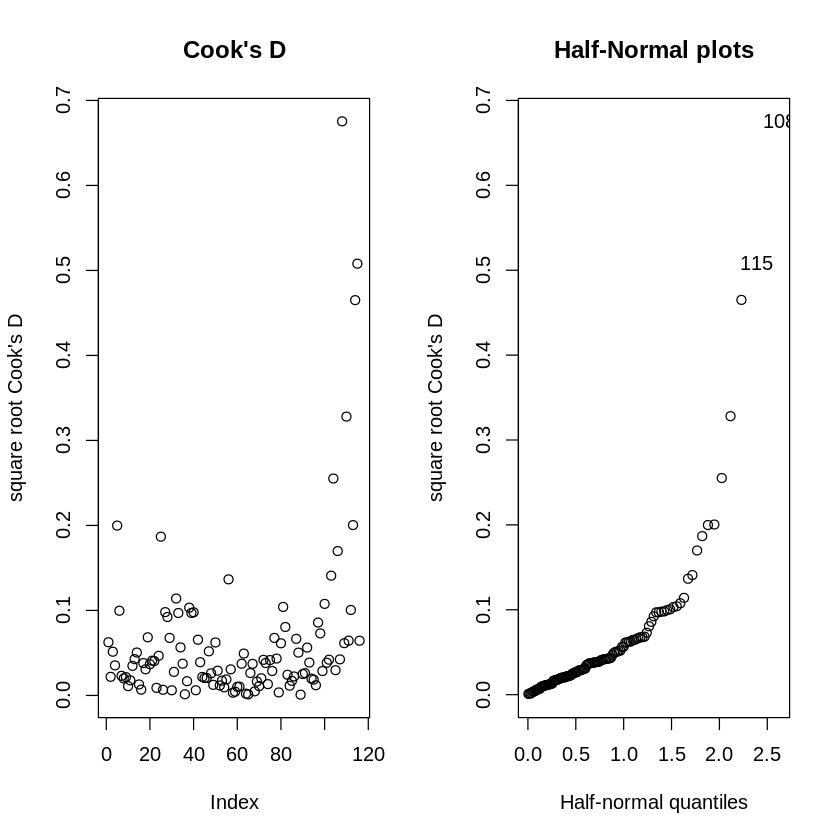

In [9]:
par(mfrow = c(1,2))
plot(sqrt(cooks.distance(fit1)), ylab = "square root Cook's D", main = "Cook's D")
halfnorm(sqrt(cooks.distance(fit1)), ylab = "square root Cook's D", main = "Half-Normal plots")

**Non-normality:** The following code graph the normal probability plot and KDE of rstudent residuals. The norm probability plot of rstudent indicates non-normality and shows slight heavy tails.

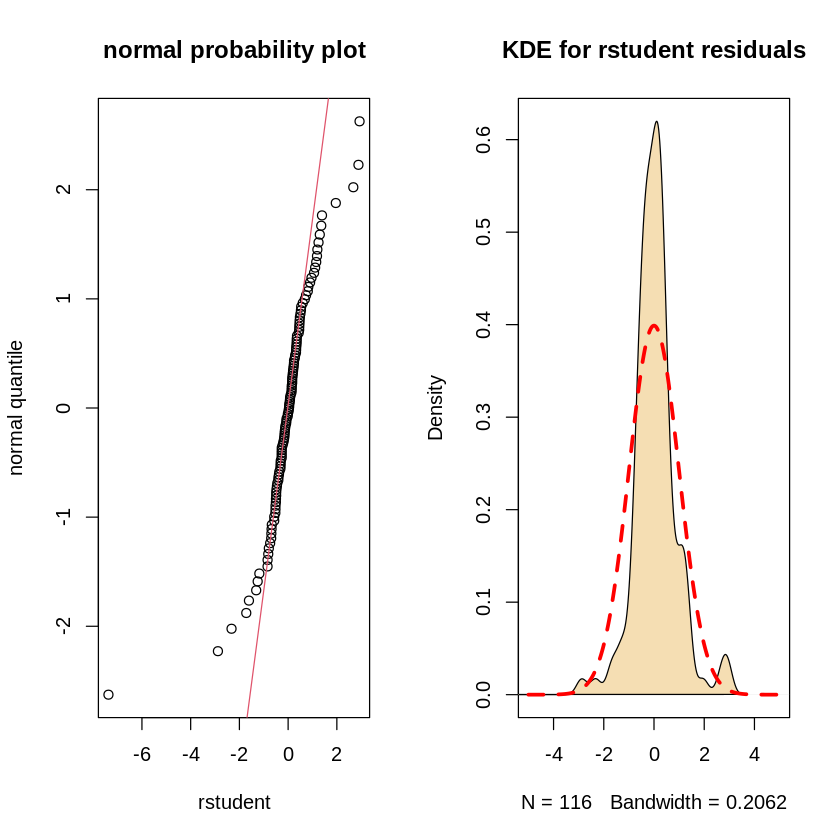

In [10]:
par(mfrow = c(1,2))
qqnorm(rstudent(fit1), datax = TRUE,
       xlab = "normal quantile", 
       ylab = "rstudent", 
       main = "normal probability plot")
qqline(rstudent(fit1), datax=TRUE, col = 2)
d <- density(rstudent(fit1), adjust = 1, na.rm = TRUE)
plot(d, type = "n", xlim=c(-5,5), main="KDE for rstudent residuals") # more sophisticated plot
polygon(d, col = "wheat")
z = seq(from=-5,to=5,by=.01)
lines(z,dnorm(z), lty=2,lwd=3,col="red")

__Problem 2__ (50pts)

Consider the intra-day trading of IBM stock on Nov 21, 1990, as shown in the graph below.  There were 726 transactions on that day during normal trading hours, but only 195 trades resulted in a price change. Let $t_i$ be the time of
the $i$-th trade that resulted in a price change.  

_Duration_ $\Delta_i =t_i - t_{i-1}$ is the time duration between price changes.  Furthermore, let
$N_i$ be the number of trades in the time interval $(t_{i-1}, t_i)$ that
resulted in no price change.  The value of $\{ \Delta_i\}$ and $\{ N_i \}$ are included in the file
`HW5-Q2.dat`.  To load the data, use the following R script:

```
dat = read.table("HW5-Q2.txt",header=TRUE) 
DUR = dat[,"duration"]
N = dat[,"trades"]
```

In this problem, we model he conditional probability $P(N_i=0|\Delta _i)$ as a function of $\log(\Delta_i)$: 
$$
P(N_i=0| \Delta_i) = f(\log(\Delta_i))
$$
for some appropriate choice of function $f$. 

__Problem 2a.__  (15 pts) Let 
```
X = log(DUR)
Y = ifelse(N==0, 1, 0)
```

The following script will allow you to fit a linear regression model:
```
mod1 = lm(Y~X)
```

Write down the mathematical representation of the fitted model, and be particular about any underlying assumption behind the model. For each of plots generated by `plot(mod1)`, forumulate a hypothesis about what the plot is suggesting, and then back up your hypothesis with the plot.   

__Problem 2b.__  (10 pts) The following script will allow you to fit a logistic regression model:

```
mod2 = glm(Y~X, family= 'binomial')
```

Write down the mathematical representation of the fitted model (See the textbook for logistic regression), and be particular about any underlying assumption behind the model (this part is a bit of reading exercise ...)


__Problem 2c.__  (10 pts) In this part, we will compare the two fitted models.  Suppose that you are trying to detect when $N=0$ given $\Delta$ (although this is not all that realistic).  Consider the following R scripts

```
p1 = predict(mod1)
p2 = predict(mod2, type = "response")

plot(density(p1));
hist(p1,add=TRUE,probability = TRUE)

plot(density(p2));
hist(p2,add=TRUE, add=TRUE, probability = TRUE)

plot(p1,p2)
```

By comparing resulting graphs, formulate a hypothesis that why one might be better than the other, and support your hypothesis with the observations made with the graphs.   


__Problem 2d.__ (5pts) This is a continuation of the last part.  Note that `p1` and `p2` are probabilities, one needs to come up with some thresholding value, say, $b$, so that we can set 

```
Y1 = p1 > b 
Y2 = p2 > b
table(Y1,Y)
table(Y2,Y)
```

As before, we are trying to detect when $N=0$ given $\Delta$.  For $b \in (0,1)$, what is the smallest and the largest value that your hypothesis becomes true? 


__Problem 2e.__ (5 pts) Repeat the last part with the objective that you are trying to detect $N>0$ given $\Delta$ 

_____

In [3]:
dat = read.table("HW5-Q2.txt",header=TRUE) 
DUR = dat[,"duration"]
N = dat[,"trades"]

**Promble 2a:** The linear regression model we get is
$$
Y = 1.40425 - 0.23519X
$$


In [4]:
X = log(DUR)
Y = ifelse(N==0, 1, 0)
mod1 = lm(Y~X)
summary(mod1)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76735 -0.28884 -0.04206  0.32272  0.78936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.40425    0.08164   17.20   <2e-16 ***
X           -0.23519    0.01927  -12.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3762 on 192 degrees of freedom
Multiple R-squared:  0.4369,	Adjusted R-squared:  0.434 
F-statistic:   149 on 1 and 192 DF,  p-value: < 2.2e-16


The following shows the four plot generated by mod1. From the Residuals v.s fitted plot, we can see the non-linearity of this model. From the normal QQ plot, the standard normal distribution has heavier tail than the sample data. Thus the model is non-normality of the errors. From the Scale-Location plot, the residuals are not spread equally along the ranges of predictors, thus the model has non-constant variance. From the residuals v.s Leverage plot, we can find the influential cases. The plot identified the influential observation as #168.

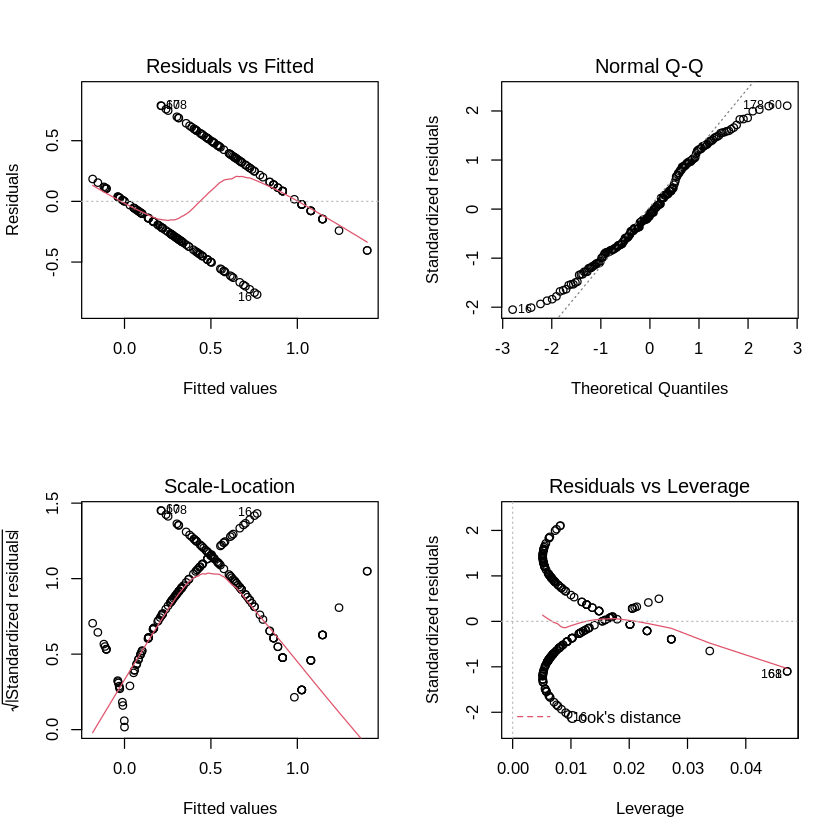

In [7]:
par(mfrow = c(2,2))
plot(mod1)

**Problem 2b:** The logistic regression model is
$$
P(Y_{i}=1 \mid X_{i} ) = H(6.8040 - 1.7371 X_{i})
$$

In [6]:
mod2 = glm(Y~X, family= 'binomial')
summary(mod2)


Call:
glm(formula = Y ~ X, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1049  -0.6270  -0.1826   0.6538   2.0677  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   6.8040     1.0154   6.701 2.07e-11 ***
X            -1.7371     0.2483  -6.997 2.61e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 267.93  on 193  degrees of freedom
Residual deviance: 157.53  on 192  degrees of freedom
AIC: 161.53

Number of Fisher Scoring iterations: 5


The following shows the four plot generated by mod2. From the Residuals v.s fitted plot, we can see the non-linearity of this model. From the normal QQ plot, the standard normal distribution has heavier tail than the sample data. Thus the model is non-normality of the errors. From the Scale-Location plot, the residuals are not spread equally along the ranges of predictors, thus the model has non-constant variance. From the residuals v.s Leverage plot, we can find the influential cases. 

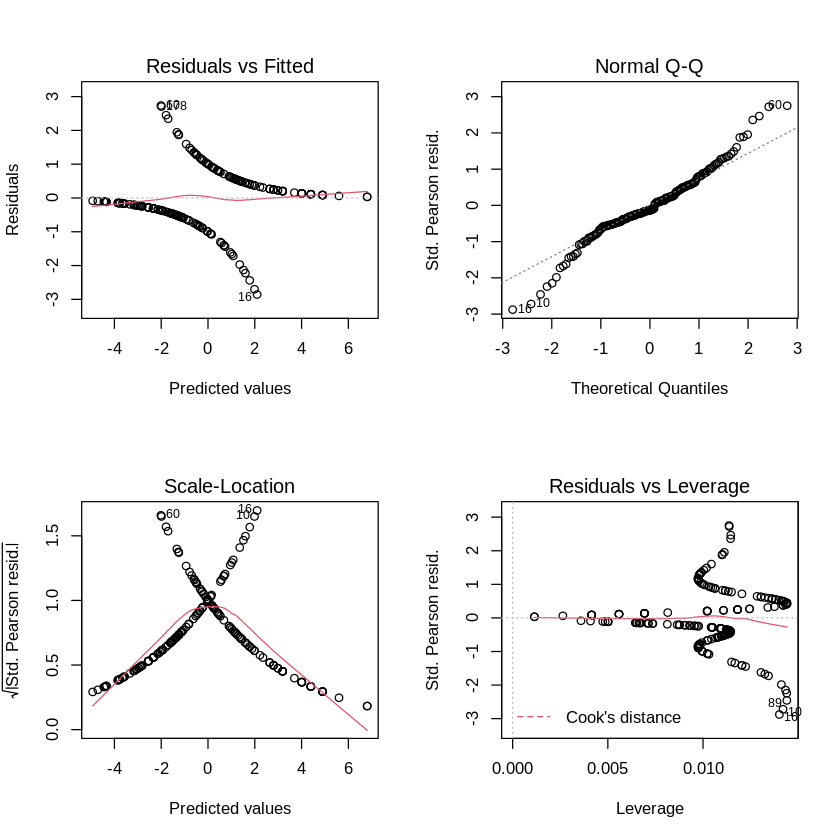

In [8]:
par(mfrow = c(2,2))
plot(mod2)

**Problem 2c:** Compare mod1 and mod2, I think the logistic regression plays a better estimation and prediction in the given mod2. Since we set the Y=1 if there is no trading and Y=0 if there is some trading. We are trying to detect when N=0, in other words Y=1. So we want our prediction best predicts the response value Y=1. Since the binary response Y can take only two values, 0 or 1, binary regression models the conditional probability that a binary response is 1, given the values of predicts X. Since a probability is considered to lie between 0 and 1, alinear model is not appropriate for a binary response.

Mod2 follows our rule of setting true Y value to be 0 or 1. The probability should between 0 and 100%. From the first two plot we can see that there is higher distributed for Y=1 which is when N=0. Thus the logistic regression fits better in this model.

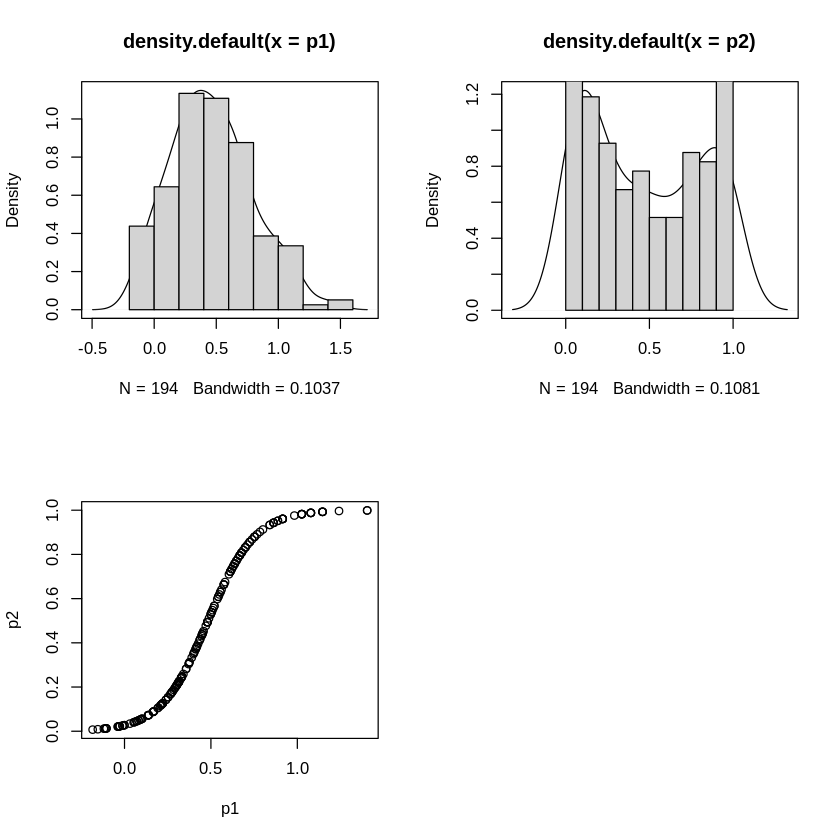

In [9]:
par(mfrow = c(2,2))
p1 = predict(mod1)
p2 = predict(mod2, type = "response")

plot(density(p1));
hist(p1,add=TRUE,probability = TRUE)
 
plot(density(p2));
hist(p2,add=TRUE, probability = TRUE)
 
plot(p1,p2)

**Problem 2d:** The thredshold I choose based on my assumption that logistic regression is better when we try to find N=0 given X is [0.48,0.96]. Since our goal is to find N=0, by previous definition, we set Y=1 for N=0, then our result in the based should be focus on the Y1=TURE and Y=1 which is the right bottom value in both tables. When we set b=0.48, then the linear model mod1 we have 68 right predictions for N=0, however, we get 70 right predictions in logistic regression mod2 for N=0. For b=0.96, we can still have a better prediction with logistic model, which has 22 right predictions for N=0 compared to 17 right predictions in linear model.

In [42]:
Y1 = p1 > 0.48
Y2 = p2 > 0.48
table(Y1,Y)
table(Y2,Y)

       Y
Y1        0   1
  FALSE 104  73
  TRUE    0  17

       Y
Y2        0   1
  FALSE 104  68
  TRUE    0  22

In [43]:
Y1 = p1 > 0.96
Y2 = p2 > 0.96
table(Y1,Y)
table(Y2,Y)

       Y
Y1        0   1
  FALSE 104  73
  TRUE    0  17

       Y
Y2        0   1
  FALSE 104  68
  TRUE    0  22

**Problem 2e:**

In [47]:
Y1 = p1 > 0.48 
Y2 = p2 > 0.48
table(Y1,Y)
table(Y2,Y)

       Y
Y1       0  1
  FALSE 87 22
  TRUE  17 68

       Y
Y2       0  1
  FALSE 84 20
  TRUE  20 70